In [2]:
library(conos)
source('lib.r')


In [4]:
anoM = readRDS('anoM.rds')
scon = readRDS('conos.myeloid.rds.rds')
sample.group = readRDS('sample.group.rds')
ssamp = scon$getDatasetPerCell()

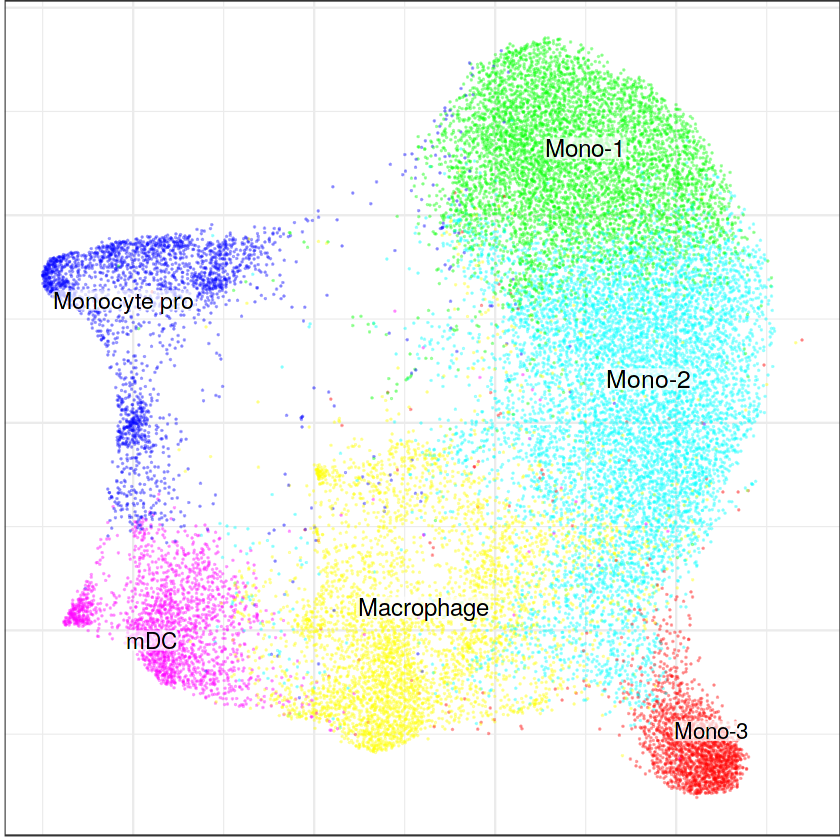

In [5]:
p1 = scon$plotGraph(groups = anoM,size=0.15,plot.na=F,font.size = c(4.6, 5.1),alpha=0.3,palette=anoM.palf,raster = TRUE)
p1

In [ ]:
anoM.pal <- setNames(sample(rainbow(length(levels(anoM)))),levels(anoM));
anoM.palf <- function(n) return(anoM.pal)


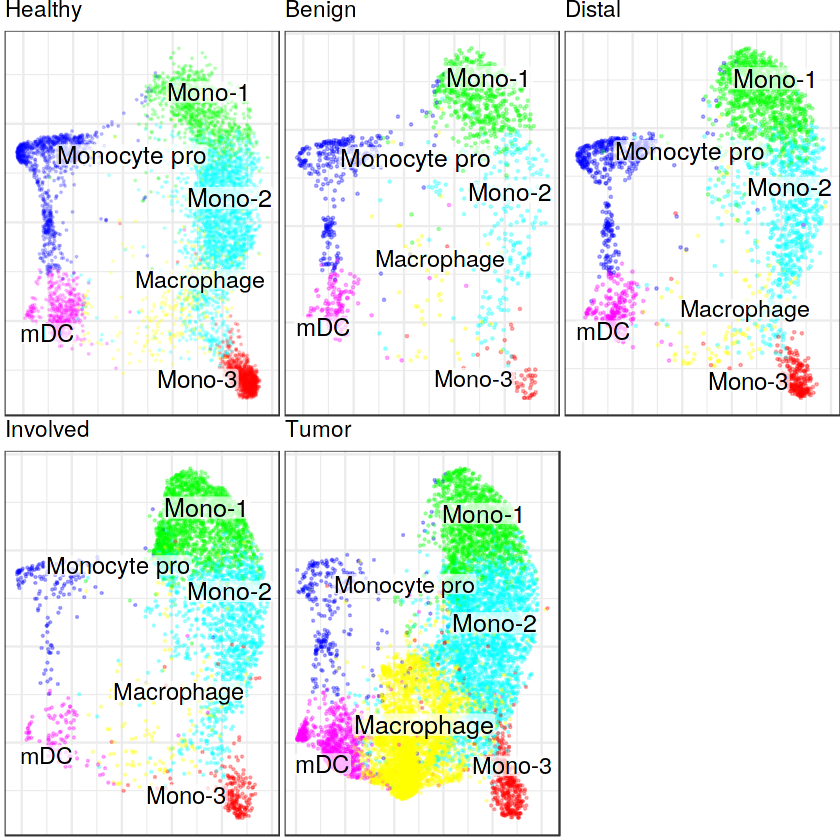

In [6]:
sample.g2 = sample.group[unique(ssamp)]

n1 = names(sample.g2[sample.g2=='Healthy'])
a4=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.25,raster = TRUE,alpha=0.2,font.size = c(4.8, 5.2),title='Healthy')


n1 = names(sample.g2[sample.g2=='Benign'])
a3=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.45,raster = TRUE,alpha=0.3,font.size = c(4.8, 5.2),title='Benign')


n1 = names(sample.g2[sample.g2=='Distal'])
a2=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.45,raster = TRUE,alpha=0.3,font.size = c(4.8, 5.2),title='Distal')


n1 = names(sample.g2[sample.g2=='Involved'])
a1=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.35,raster = TRUE,alpha=0.3,font.size = c(4.8, 5.2),title='Involved')

n1 = names(sample.g2[sample.g2=='Tumor'])
a5=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.35,raster = TRUE,alpha=0.3,font.size = c(4.8, 5.2),title='Tumor')



b=  cowplot::plot_grid(plotlist=list(a4,a3,a2,a1,a5), ncol=3, nrow=2)
b

In [12]:
options(warn=0)

genes=c('C1QA','IL1B','MSR1','TREM2','SPP1','CD163','MKI67')#,'IL10','CD163','CCL20','CCL4'


exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)


stacked.plot(anoM,genes,exp,anoM.pal,'F3.myeloid.violin.pdf',height = 0.7)


[1]     7 23342

[1] "TREM2"
[1] "IL10"
[1] "C1QA"
[1] "C1QB"
[1] "CD1C"
[1] "MKI67"
[1] "CD163"
[1] "FCGR3A"
[1] "S100A8"


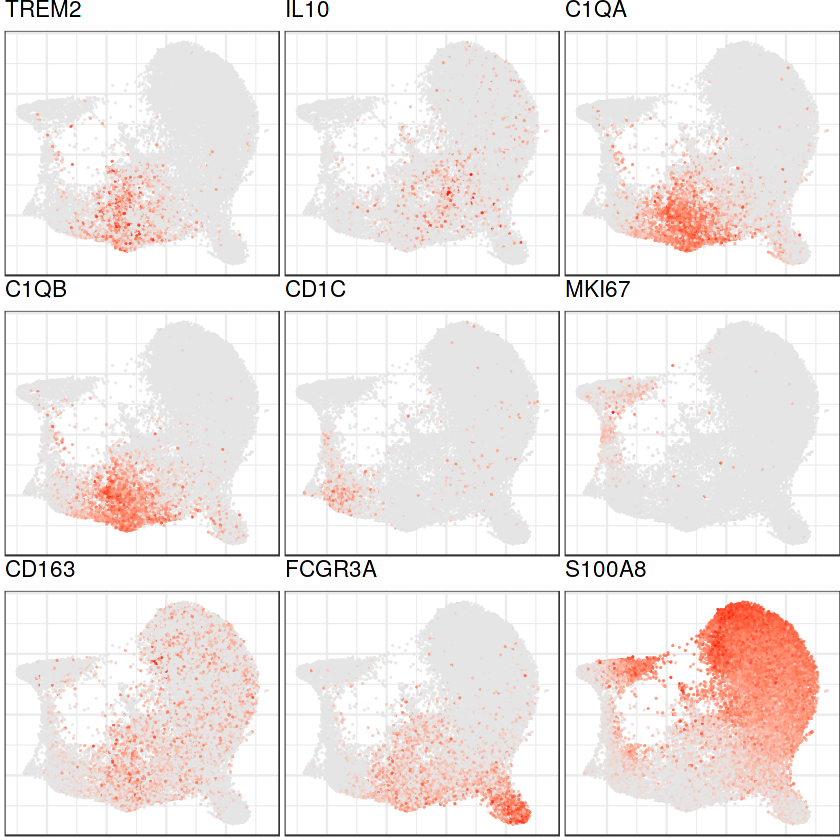

In [16]:
features = c('TREM2','IL10','C1QA','C1QB','CD1C','MKI67','CD163','FCGR3A','S100A8')#,'LRRC15'
pl=lapply(sn(features), function(x) {print(x);
scon$plotGraph(gene=x, title=x,size=0.05,alpha=0.7,raster = T,plot.na=F)})

b=plot_grid(plotlist=pl, nrow = 3)
b


In [18]:
#glisg = scProcess::getMarkers()
features = glisg$M2
features

[1] "ARG1"       "ARG2"       "IL10"       "CD32"       "CD163"     
 [6] "CD23"       "FCER2"      "CD200R1"    "PD-L2"      "PD-L1"     
[11] "MARCO"      "CSF1R"      "CD206"      "IL1RA"      "IL14R"     
[16] "CCL4"       "CCL13"      "CCL20"      "CCl17"      "CCL18"     
[21] "CCl22"      "CCL24"      "LYVE1"      "VEGFA"      "VEGFB"     
[26] "VEGFC"      "VEGFD"      "EGF"        "CTSA"       "CTSB"      
[31] "CTSC"       "CTSD"       "TGFB1"      "TGFB2"      "TGFB3"     
[36] "MMP14"      "MMP19"      "MMP9"       "CLEC7A"     "WNT7B"     
[41] "FASL"       "TNSF12"     "TNSF8CD276" "VTCN1"      "MSR1"      
[46] "FN1"        "IRF4"

In [19]:
exp <- do.call(rbind,lapply(sn(features),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)
score = rowMeans(t(exp)) 

[1]    47 23342

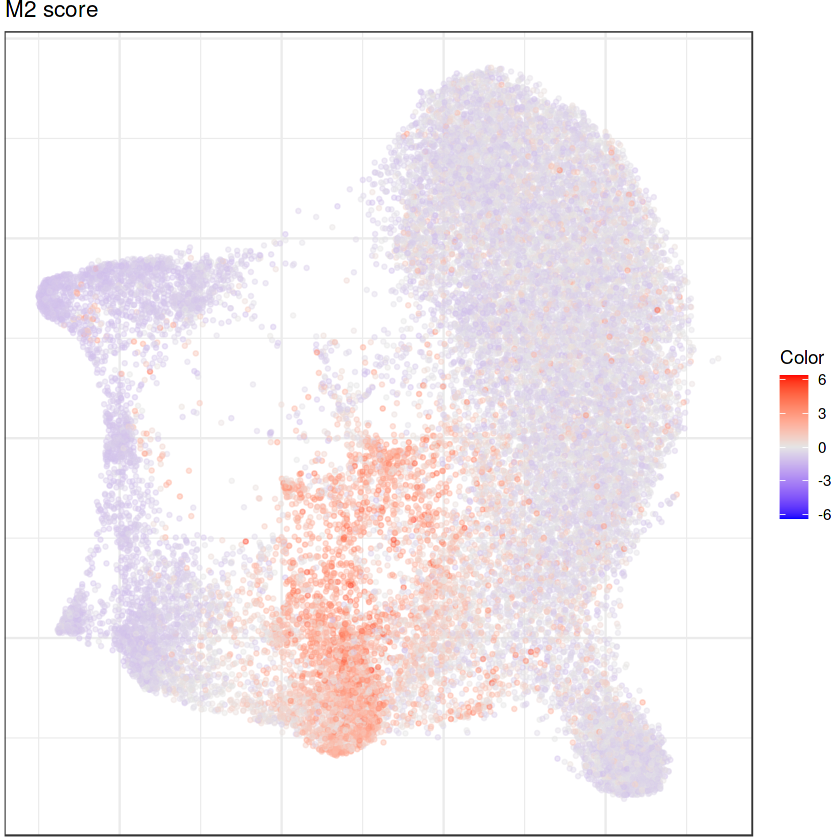

In [20]:
title = 'M2 score'
score2 = scale(score)
names(score2) = names(score)

a1=scon$plotGraph(colors = score2,title=title,show.legend=TRUE)#,raster = TRUE
a1

[1] "TREM2"
[1] "C1QA"
[1] "MSR1"
[1] "IL10"


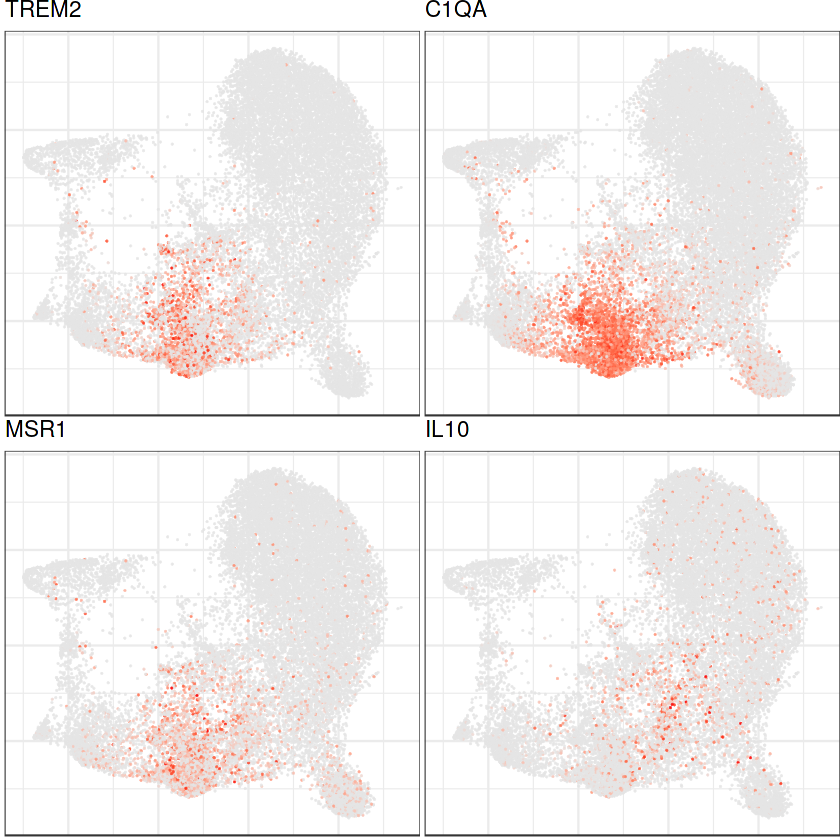

In [21]:
features = c('TREM2','C1QA','MSR1','IL10')#,'LRRC15'
pl=lapply(sn(features), function(x) {print(x);
   scon$plotGraph(gene=x, title=x,size=0.05,alpha=0.7,raster = T,plot.na=F)})

b=plot_grid(plotlist=pl, nrow = 2)
b

Using SampleType as value column: use value.var to override.



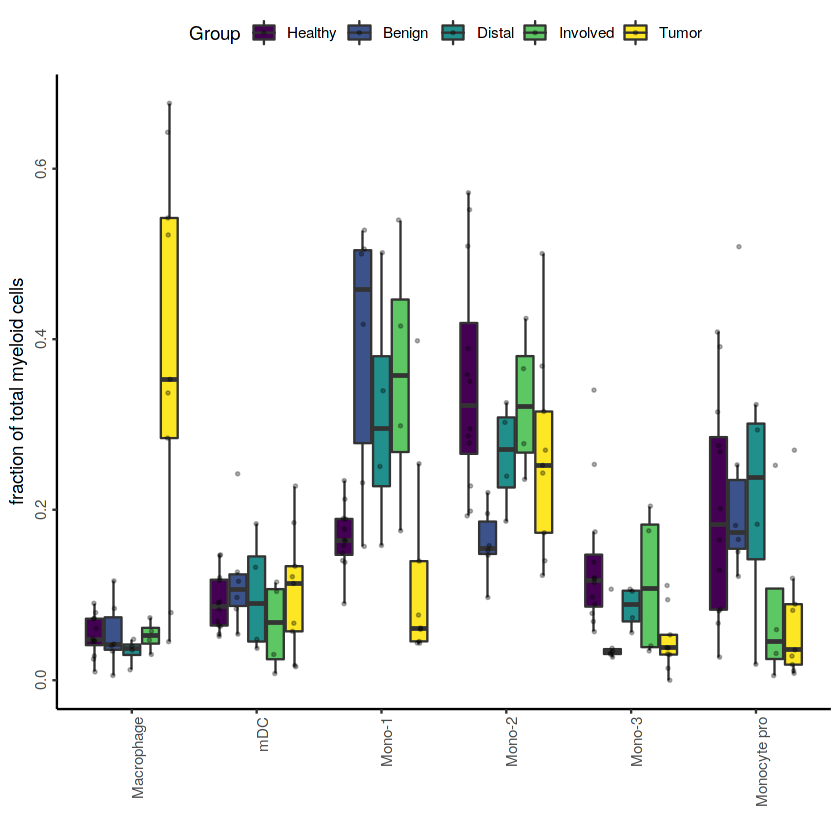

In [22]:
cellProportion  = function(scon){
    cname = names(scon$misc$cell.type)
    ano2=data.frame('Cell'=scon$misc$cell.type[cname],'SampleType'=scon$misc$cell.sample[cname])

    # Annotation vs sample
    tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

    tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
    tmp4 <- melt(tmp3)
    head(tmp4)

    names(tmp4) <- c('cell', 'sample','pc.of.sample')

    tmp4$Group=NULL
    tmp4$Group=scon$misc$sample.groups[as.character(tmp4$sample)]


    p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
      theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total myeloid cells")+theme(legend.position="top") #+
    #  scale_fill_manual(values=fraction.palette1)
    return(p)
    }
p=cellProportion(scon)
p

In [23]:
load('/home/meisl/Workplace/RCC.boneMet/Figures/F4.myeloid/Join.RData')
# joint analysis of RCC primary and RCC bone Met myeloid cells

[1] "CCL20"
[1] "IL1B"
[1] "FABP5"
[1] "SPP1"
[1] "SEPP1"
[1] "FOLR2"


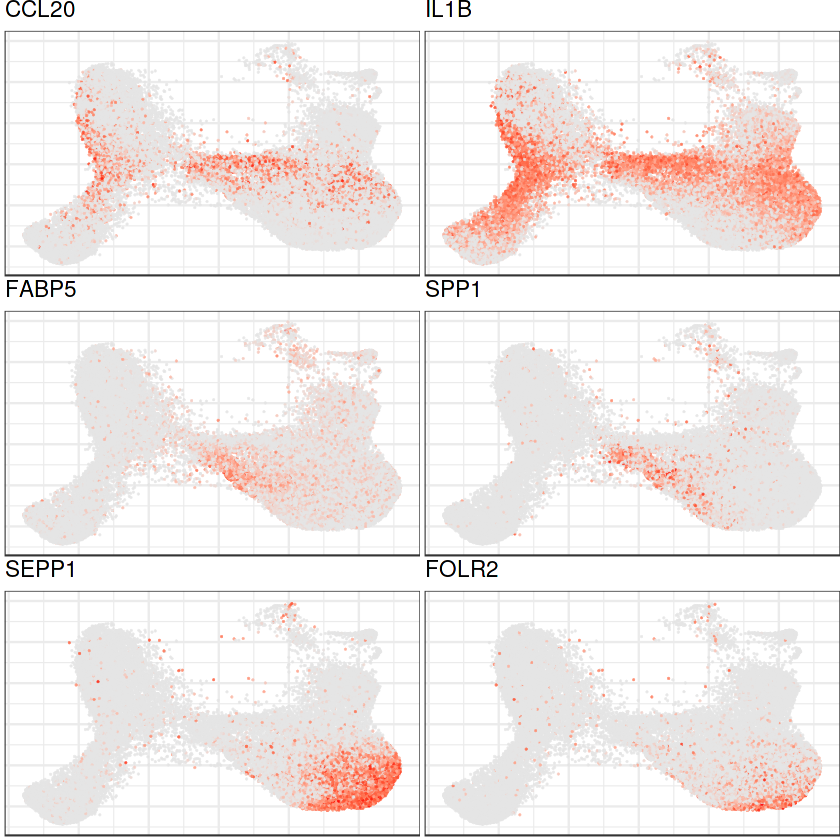

In [24]:
features = c('CCL20','IL1B','FABP5','SPP1','SEPP1','FOLR2')#,'LRRC15'
pl=lapply(sn(features), function(x) {print(x);
   cc$plotGraph(gene=x, title=x,size=0.05,alpha=0.7,raster = T,plot.na=F)})

b=plot_grid(plotlist=pl, nrow = 3)
b

In [32]:
ano = readRDS('fMyeloid.join.rds')
names(ano)

[1] "ano"      "fraction" "sample"

In [48]:
ssamp = ano$sample
anoM2 = ano$ano

ano2=data.frame('Cell'=anoM2,'SampleType'=ssamp[names(anoM2)])

    # Annotation vs sample
    tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

    tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
    tmp4 <- melt(tmp3)
    head(tmp4)

    names(tmp4) <- c('cell', 'sample','pc.of.sample')

   # tmp4$Group='RCC Bone Met'
    tmp4$Group='RCC Bone Met'

tmp4[grepl('-PTumor',tmp4$sample),'Group']='RCC Primary'


Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Macro-1,RCC-BM1-Normal,0.19423631
2,Macro-2,RCC-BM1-Normal,0.03515850
3,Macro-3,RCC-BM1-Normal,0.08011527
4,mDC,RCC-BM1-Normal,0.12334294
5,Mono-1,RCC-BM1-Normal,0.08645533
6,Mono-2,RCC-BM1-Normal,0.29048991


In [50]:
df = tmp4
df2 = df[grepl('Macro',df[,1]),]


In [51]:

fraction.palette2 = c('grey30','gold3','red')
names(fraction.palette2) = c('adj-Nomral','RCC Primary','RCC Bone Met')


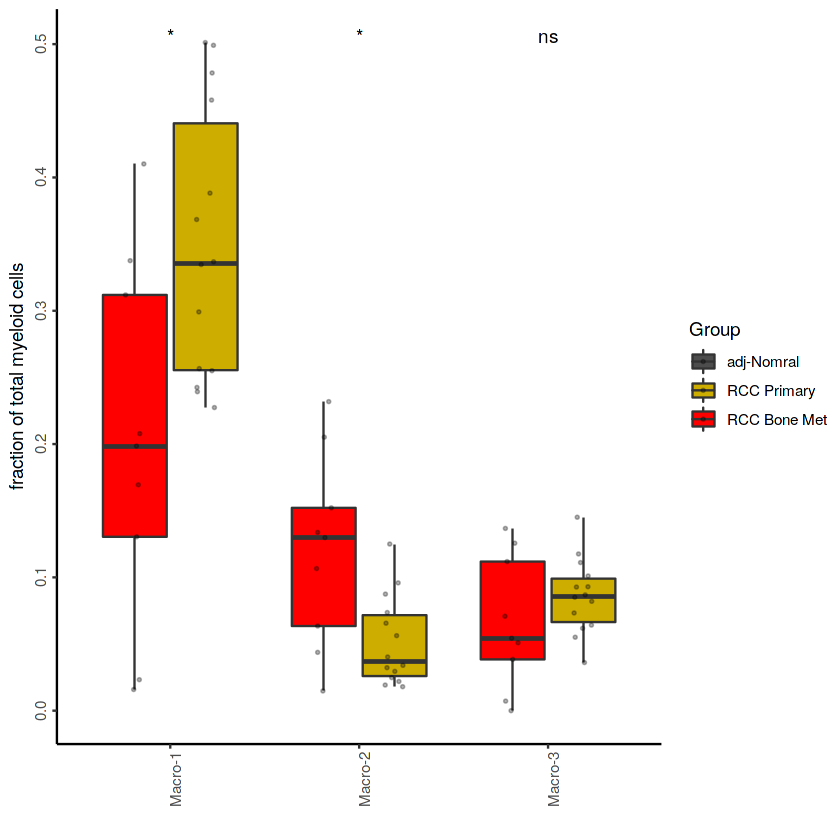

In [52]:
ylab = 'fraction of total myeloid cells'
p <- ggplot(na.omit(df2),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+
geom_boxplot(notch=FALSE,outlier.shape=NA)  +  
geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+
theme_classic()+
scale_fill_manual(values=fraction.palette2)+
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+
theme(legend.position="right") #+
p=p+ ggpubr::stat_compare_means(aes(group = Group), 
                label = "p.signif")
p